In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [105]:
df = pd.read_csv('sales_predictions.csv')

In [106]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [108]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [110]:
df.duplicated().sum()

0

Hay valores nulos pero no hay valores duplicados

In [111]:
df = df.sort_values(['Item_Weight','Outlet_Size'])

In [112]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7808,FDP40,4.555,Regular,0.034329,Frozen Foods,110.1544,OUT013,1987,High,Tier 3,Supermarket Type1,1230.3984
4400,FDP40,4.555,Regular,0.034411,Frozen Foods,111.3544,OUT049,1999,Medium,Tier 1,Supermarket Type1,1342.2528
3489,FDP40,4.555,Regular,0.034351,Frozen Foods,112.7544,OUT035,2004,Small,Tier 2,Supermarket Type1,1789.6704
4430,FDP40,4.555,Regular,0.034357,Frozen Foods,112.6544,OUT046,1997,Small,Tier 1,Supermarket Type1,2684.5056
6432,DRE12,4.590,Low Fat,0.070722,Soft Drinks,113.2860,OUT013,1987,High,Tier 3,Supermarket Type1,1471.4180
...,...,...,...,...,...,...,...,...,...,...,...,...
8454,NCH54,NaN,Low Fat,0.127234,Household,158.3920,OUT019,1985,Small,Tier 1,Grocery Store,159.7920
8458,FDX20,NaN,Low Fat,0.074518,Fruits and Vegetables,227.3720,OUT019,1985,Small,Tier 1,Grocery Store,452.7440
8469,FDQ45,NaN,Regular,0.019114,Snack Foods,182.1608,OUT019,1985,Small,Tier 1,Grocery Store,367.5216
8480,FDQ58,NaN,Low Fat,0.000000,Snack Foods,154.5340,OUT019,1985,Small,Tier 1,Grocery Store,459.4020


In [113]:
test_data = df[df['Item_Weight'].isnull()]
test_data
save_Outlet_Size= df['Outlet_Size']

In [114]:
df['Item_Weight'].dropna(inplace=True)

In [115]:
df.shape

(8523, 12)

In [116]:
df.drop('Outlet_Size', 1)

C:\Users\nicol\AppData\Local\Temp/ipykernel_7852/2720572991.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop('Outlet_Size', 1)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7808,FDP40,4.555,Regular,0.034329,Frozen Foods,110.1544,OUT013,1987,Tier 3,Supermarket Type1,1230.3984
4400,FDP40,4.555,Regular,0.034411,Frozen Foods,111.3544,OUT049,1999,Tier 1,Supermarket Type1,1342.2528
3489,FDP40,4.555,Regular,0.034351,Frozen Foods,112.7544,OUT035,2004,Tier 2,Supermarket Type1,1789.6704
4430,FDP40,4.555,Regular,0.034357,Frozen Foods,112.6544,OUT046,1997,Tier 1,Supermarket Type1,2684.5056
6432,DRE12,4.590,Low Fat,0.070722,Soft Drinks,113.2860,OUT013,1987,Tier 3,Supermarket Type1,1471.4180
...,...,...,...,...,...,...,...,...,...,...,...
8454,NCH54,NaN,Low Fat,0.127234,Household,158.3920,OUT019,1985,Tier 1,Grocery Store,159.7920
8458,FDX20,NaN,Low Fat,0.074518,Fruits and Vegetables,227.3720,OUT019,1985,Tier 1,Grocery Store,452.7440
8469,FDQ45,NaN,Regular,0.019114,Snack Foods,182.1608,OUT019,1985,Tier 1,Grocery Store,367.5216
8480,FDQ58,NaN,Low Fat,0.000000,Snack Foods,154.5340,OUT019,1985,Tier 1,Grocery Store,459.4020


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 7808 to 8490
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


In [118]:
y_train =  df['Item_Weight']

In [119]:
y_train

7808    4.555
4400    4.555
3489    4.555
4430    4.555
6432    4.590
        ...  
8454      NaN
8458      NaN
8469      NaN
8480      NaN
8490      NaN
Name: Item_Weight, Length: 8523, dtype: float64

In [120]:
y_train.shape

(8523,)

Luego de comprobar que una regresión lineal no era la solución porque no existen columnas relacionadas con lo que se busca predecir, se opto por transformar los valores nulos en 0.

In [121]:
df = pd.read_csv('sales_predictions.csv')

In [122]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [123]:
df['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [124]:
df['Item_Weight']=df['Item_Weight'].fillna(12.857645)

In [125]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [127]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [128]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [129]:
df.shape

(8523, 12)

In [130]:
valores_tienda= df.groupby('Outlet_Identifier')['Outlet_Size'].sum()

In [131]:
valores_tienda

Outlet_Identifier
OUT010                                                    0
OUT013    HighHighHighHighHighHighHighHighHighHighHighHi...
OUT017                                                    0
OUT018    MediumMediumMediumMediumMediumMediumMediumMedi...
OUT019    SmallSmallSmallSmallSmallSmallSmallSmallSmallS...
OUT027    MediumMediumMediumMediumMediumMediumMediumMedi...
OUT035    SmallSmallSmallSmallSmallSmallSmallSmallSmallS...
OUT045                                                    0
OUT046    SmallSmallSmallSmallSmallSmallSmallSmallSmallS...
OUT049    MediumMediumMediumMediumMediumMediumMediumMedi...
Name: Outlet_Size, dtype: object

En este apartado se aprecia que se desconoce el tamaño de aquellas tiendas y como no se puede predecir, se opta por dropear aquellos con valores nuls

In [132]:
df1=df.dropna()

In [133]:
df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FDF53,20.750,reg,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [134]:
df.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [135]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [136]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [137]:

df['Outlet_Location_Type']=df.Outlet_Location_Type.map({'Tier 1':1,'Tier 2':2,'Tier 3':3})
df['Outlet_Size']=df.Outlet_Size.map({'Small':1,'Medium':2,'High':3})
df['Outlet_Type']= df.Outlet_Type.map({'Supermarket Type1':1,'Grocery Store':2,'Supermarket Type3':3,'Supermarket Type2':4})


In [138]:
df['Outlet_Size'].value_counts()

2.0    2793
1.0    2388
3.0     932
Name: Outlet_Size, dtype: int64

In [139]:
df.dropna()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,2.0,1,1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,2.0,3,4,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,2.0,1,1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,3.0,3,1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,2.0,3,4,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FDF53,20.750,reg,0.083607,Frozen Foods,178.8318,OUT046,1997,1.0,1,1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,3.0,3,1,2778.3834
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,1.0,2,1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,2.0,3,4,1845.5976


In [140]:
df2= df[['Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Outlet_Sales']]

In [141]:
df2.corr()

,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Outlet_Size,1.000000,0.635185,0.142798,0.129076
Outlet_Location_Type,0.635185,1.000000,0.557050,0.089367
Outlet_Type,0.142798,0.557050,1.000000,0.020871
Item_Outlet_Sales,0.129076,0.089367,0.020871,1.000000


In [142]:
df2.corr().style.background_gradient(cmap='coolwarm')

,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Outlet_Size,1.000000,0.635185,0.142798,0.129076
Outlet_Location_Type,0.635185,1.000000,0.557050,0.089367
Outlet_Type,0.142798,0.557050,1.000000,0.020871
Item_Outlet_Sales,0.129076,0.089367,0.020871,1.000000


In [143]:
df=df.dropna()

In [144]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,2.0,1,1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,2.0,3,4,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,2.0,1,1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,3.0,3,1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,2.0,3,4,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FDF53,20.750,reg,0.083607,Frozen Foods,178.8318,OUT046,1997,1.0,1,1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,3.0,3,1,2778.3834
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,1.0,2,1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,2.0,3,4,1845.5976


Histogramas para ver la distribución de varias características en tu conjunto de datos
Diagramas de caja para ver los resúmenes estadísticos de varias características en tu conjunto de datos.
Bonus: mapas de calor de las correlaciones entre características
Cualquier cosa que quieras continuar refinando para el proyecto (siéntete libre de continuar con los trabajos de las semanas anteriores que no tuviste tiempo para completar).

(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.,
        14000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

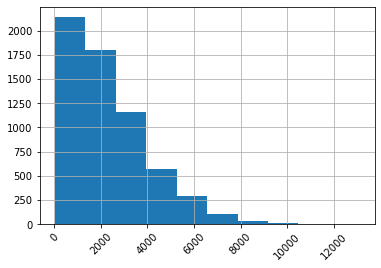

In [145]:
df['Item_Outlet_Sales'].hist()
plt.xticks(rotation = 45)


Existe una tendencia en las ventas hacia la izquierda, es decir, que la concentración de los valores está en el lado inferior.

<AxesSubplot:>

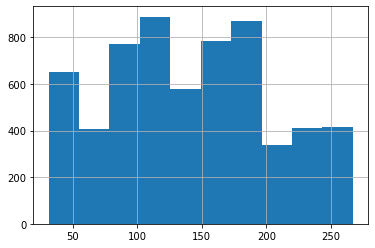

In [146]:
df['Item_MRP'].hist()

La distribución del valor MRP que es la distribución de los productos presenta una distribución atípica que no sigue un orden. 

<AxesSubplot:>

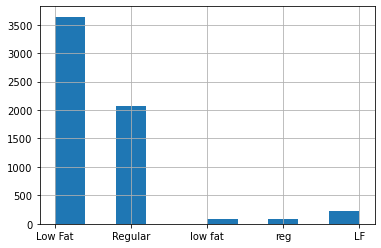

In [147]:
df['Item_Fat_Content'].hist()

Los item de low fat son poseen una mayor cantidad, mientras que los regulares están cerca de 1500 puntos por debaje. Se evidencian errores de tipeo ya que hay dos lineas para low fat según si hay mayusculas. 

In [149]:
df['Outlet_Size'].value_counts()

2.0    2793
1.0    2388
3.0     932
Name: Outlet_Size, dtype: int64

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6113 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6113 non-null   object 
 1   Item_Weight                6113 non-null   float64
 2   Item_Fat_Content           6113 non-null   object 
 3   Item_Visibility            6113 non-null   float64
 4   Item_Type                  6113 non-null   object 
 5   Item_MRP                   6113 non-null   float64
 6   Outlet_Identifier          6113 non-null   object 
 7   Outlet_Establishment_Year  6113 non-null   int64  
 8   Outlet_Size                6113 non-null   float64
 9   Outlet_Location_Type       6113 non-null   int64  
 10  Outlet_Type                6113 non-null   int64  
 11  Item_Outlet_Sales          6113 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 620.9+ KB


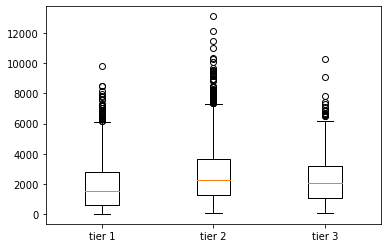

In [156]:
tier_1 = df.loc[df['Outlet_Size']==1.0, 'Item_Outlet_Sales'].values
tier_2 = df.loc[df['Outlet_Size']==2.0,'Item_Outlet_Sales'].values
tier_3 = df.loc[df['Outlet_Size']==3.0, 'Item_Outlet_Sales'].values
plt.boxplot([tier_1,tier_2,tier_3], labels=['tier 1', 'tier 2','tier 3']);

In [159]:
df['Item_Type'].value_counts()

Fruits and Vegetables    883
Snack Foods              868
Household                649
Frozen Foods             615
Dairy                    496
Canned                   471
Baking Goods             463
Health and Hygiene       367
Soft Drinks              312
Meat                     309
Breads                   179
Hard Drinks              148
Others                   123
Starchy Foods            105
Breakfast                 79
Seafood                   46
Name: Item_Type, dtype: int64

Se evidencia que la concentración de valores del segundo tipo de tamaño de tienda es relativamente mayor, al rededor de 3500, mientras que las de gran tamaño concentran sus ventas al rededor de los 2000, y finalmente las pequeñas son las menores teniendo su mediana por debajo de los 2000. Sin embargo, lo que llama la atención es la cantidad de valores atípicos que escapan de la distribución normal. 

In [ ]:
enlatada = df.loc[df['Item_Type']=='Canned', 'Item_MRP'].values
congelada = df.loc[df['Item_Type']=='Frozen Foods','Item_MRP'].values
plt.figure(dpi=250)
plt.boxplot([congelada, enlatada], labels=['Congelada', 'Enlatada']);

Es interesante aunque la mediana de la comida enlatada sea mayor, el rango de distribución de la comida congelada es más amplio, empero, no hay grandes diferencias entre ambas según la necesidad de estas. 

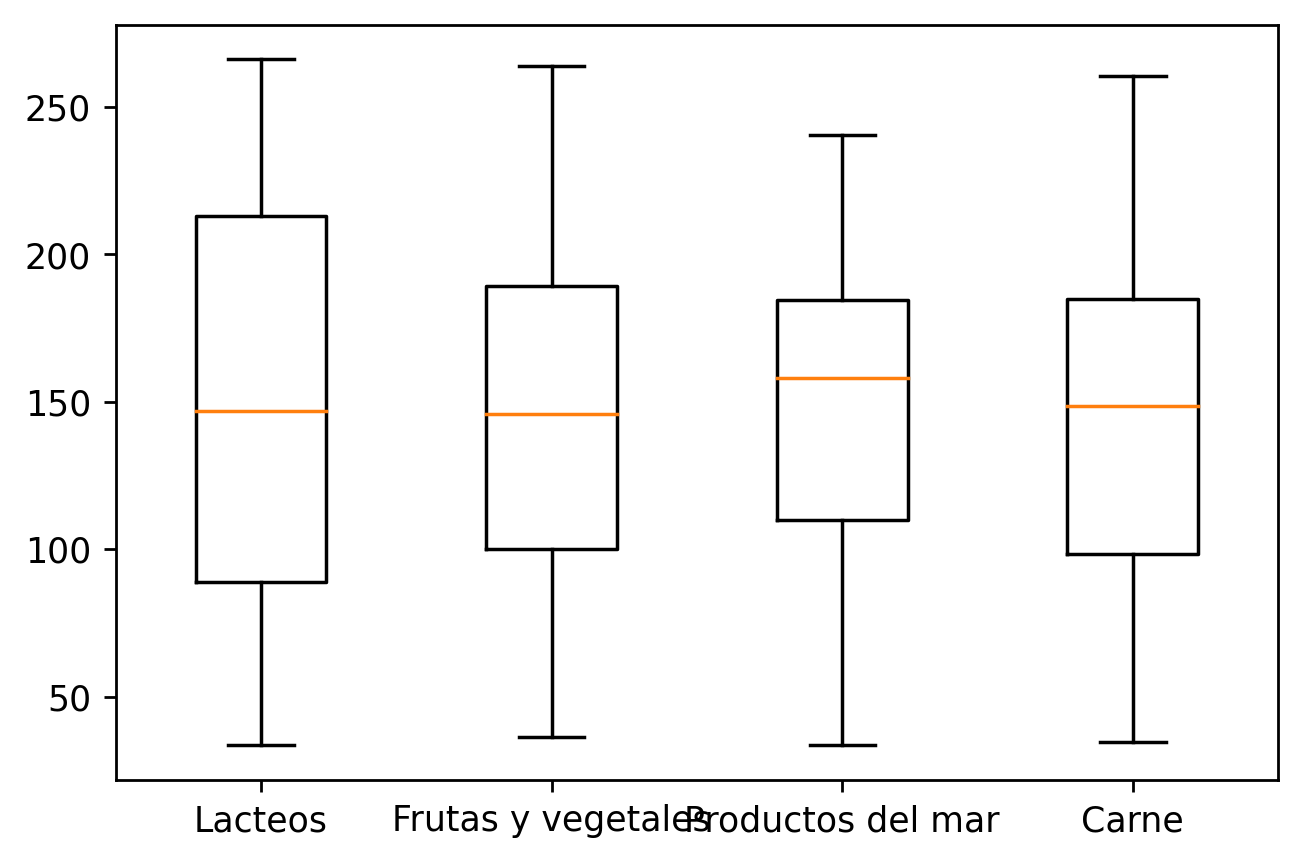

In [163]:
lacteos = df.loc[df['Item_Type']=='Dairy', 'Item_MRP'].values
frutas_vegetales = df.loc[df['Item_Type']=='Fruits and Vegetables','Item_MRP'].values
mariscos = df.loc[df['Item_Type']=='Seafood','Item_MRP'].values
carnes = df.loc[df['Item_Type']=='Meat','Item_MRP'].values

plt.figure(dpi=250)
plt.boxplot([lacteos, frutas_vegetales,mariscos,carnes], labels=['Lacteos', 'Frutas y vegetales','Productos del mar','Carne']);

La distribución más amplea la tienen los lacteos. La mediana de MRP más alta está en los productos de mar, es decir, son más socilitados. Los grupos del mar están desbalanceados respecto al resto y a ello pued edeberse que su concentración sea mayor. Hay un sesgo al agrupar frutas y vegetales que quita precisión al análisis. 